In [24]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [85]:
with h5py.File("jet-images_Mass60-100_pT250-300_R1.25_Pix25.hdf5", "r") as f:
    # Print all root level object names (aka keys) 
    # these can be group or dataset names 
    print(f"Keys: {f.keys()}")
    print(len(f["image"]))
    #Get 100 images
    test_images = f["image"][0:100]
    test_etas = f["jet_eta"][0:100]
    test_phis = f["jet_phi"][0:100]
    test_pt = f["jet_pt"][0:100]

Keys: <KeysViewHDF5 ['image', 'jet_delta_R', 'jet_eta', 'jet_mass', 'jet_phi', 'jet_pt', 'signal', 'tau_1', 'tau_2', 'tau_21', 'tau_3', 'tau_32']>
872666


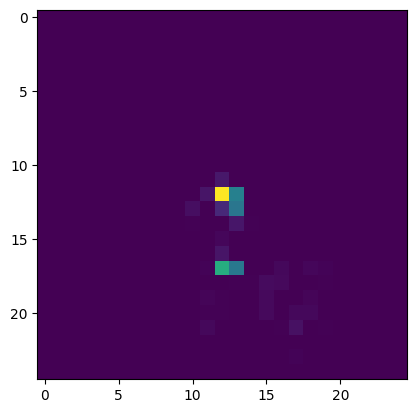

In [78]:
plt.imshow(test_images[0])

In [13]:
#Images are calorimeter images with granularity 0.1 with eta x phi [−1.25, 1.25] × [−1.25, 1.25]
def jet_image(ax, data, delta_x, delta_y):
    #data is an NxN array with granularity delta_phi, delta_eta
    ax.set_ylabel(r"$\phi$ [radians]", fontsize=12)
    ax.set_xlabel(r"$\eta$", fontsize=12)
    ax.tick_params(which="both", direction="inout", top=True, right=True, labelsize=12, pad=5, length=4, width=2)
    ax.tick_params(which="major", length=8)
    ax.tick_params(which="minor", length=6)
    ax.minorticks_on()
    len_x = data.shape[0]
    len_y = data.shape[1]
    ax.imshow(data, extent=[-(len_x*delta_x)/2, (len_x*delta_x)/2, -(len_y*delta_y)/2, (len_y*delta_y)/2], aspect='auto')


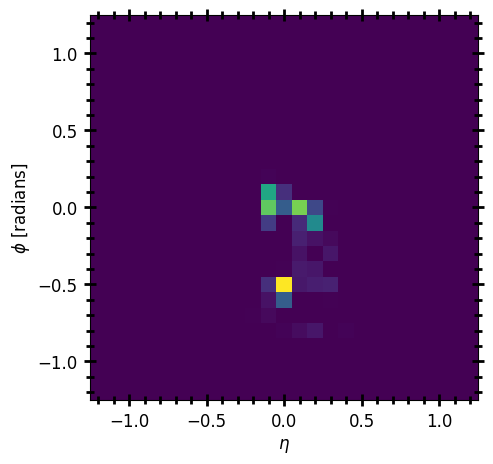

In [86]:
fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize = (5, 5))
#Get a random image:
k = np.random.randint(0, len(test_images))
jet_image(axs, test_images[k], 0.1, 0.1)

In [118]:
k = np.random.randint(0, len(test_images))
#Intensity of pixel is in GeV
print(np.sum(test_images[k]))
print(test_pt[k])
test_images[k]

285.9665
278.18832


array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.0000

0.6935716 4.788193 254.68245


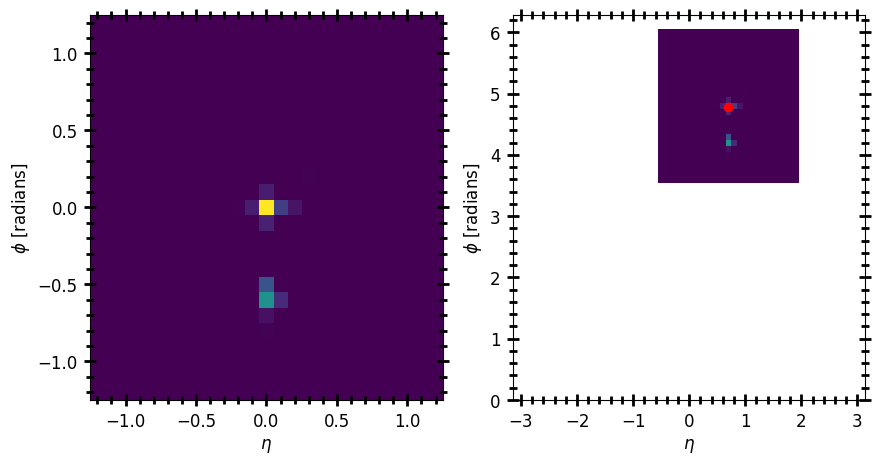

In [112]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))
def calorimeter_image(ax, jet_image, jet_eta, jet_phi):
    #Calorimeter goes from 0 to 2pi in phi and -inf to inf in eta, but -5 to 5 covers most of it
    extent_x, extent_y = (1.25, 1.25)
    ax.set_xlim(-np.pi, np.pi)
    ax.set_ylim(0, 2*np.pi)
    ax.set_ylabel(r"$\phi$ [radians]", fontsize=12)
    ax.set_xlabel(r"$\eta$", fontsize=12)
    ax.tick_params(which="both", direction="inout", top=True, right=True, labelsize=12, pad=5, length=4, width=2)
    ax.tick_params(which="major", length=8)
    ax.tick_params(which="minor", length=6)
    ax.minorticks_on()
    ax.imshow(jet_image, 
              extent=[-extent_x + jet_eta, extent_x + jet_eta, -extent_y + jet_phi, extent_y  + jet_phi], 
              aspect='auto')
    ax.scatter(jet_eta, jet_phi, color="red")
    
k = np.random.randint(0, len(test_images))
print(test_etas[k], test_phis[k], test_pt[k])
jet_image(axs[0], test_images[k], 0.1, 0.1)
calorimeter_image(axs[1], test_images[k], test_etas[k], test_phis[k])

In [114]:
with h5py.File("jet-images_Mass60-100_pT250-300_R1.25_Pix25.hdf5", "r") as f:
    # Print all root level object names (aka keys) 
    # these can be group or dataset names 
    print(f"Keys: {f.keys()}")
    print(len(f["image"]))
    #Get 100 images
    test_etas = f["jet_eta"][0:1000]
    test_phis = f["jet_phi"][0:1000]
    test_masses = f["jet_mass"][0:1000]

Keys: <KeysViewHDF5 ['image', 'jet_delta_R', 'jet_eta', 'jet_mass', 'jet_phi', 'jet_pt', 'signal', 'tau_1', 'tau_2', 'tau_21', 'tau_3', 'tau_32']>
872666


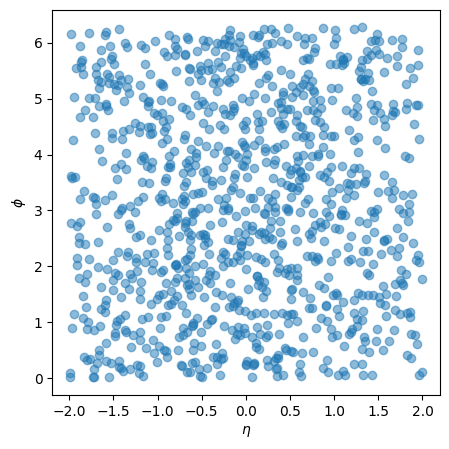

In [115]:
#Plot some of the statistics on the features
fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize = (5, 5))
axs.scatter(test_etas, test_phis, alpha=0.5)
axs.set_xlabel(r"$\eta$")
axs.set_ylabel(r"$\phi$")
plt.show()

(array([ 37.,  38.,  62., 157., 284., 258., 101.,  31.,  18.,  14.]),
 array([60.09773254, 64.07707214, 68.05641174, 72.03575897, 76.01509857,
        79.99443817, 83.97377777, 87.95311737, 91.9324646 , 95.9118042 ,
        99.8911438 ]),
 <BarContainer object of 10 artists>)

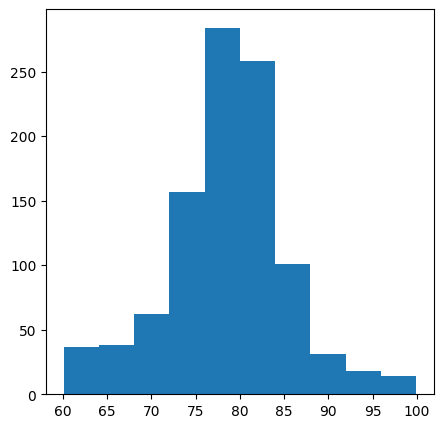

In [116]:
fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize = (5, 5))
axs.hist(test_masses)

<Axes: ylabel='Count'>

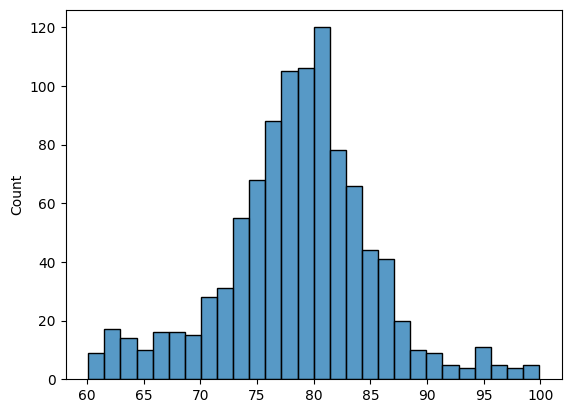

In [77]:
import seaborn as sn
sn.histplot(test_masses)